In [1]:
# To import various libraries

import math
import cv2
import numpy as np
from PIL import Image
from scipy.fft import fft
from scipy.fftpack import ifft
import matplotlib.pyplot as plt

In [2]:
# To access image1 "fourier.png" and converting it into an array.               (image1 "fourier.png")

image_source1 = Image.open('fourier.png')
image_source1.show()
image1_array = np.array(image_source1)
A,B = image1_array.shape
print(A,B)
N=A*B

340 280


In [3]:
# Implementing 2D DFT using row-column decomposition                            (image1 "fourier.png")

intermediate1 = np.empty((A,B),dtype='complex_')
for i in range (0,A):
    interows1 = image1_array[i,:]
    intermediate1[i,:]=fft(interows1)
    
finalF1 = np.empty((A,B),dtype='complex_')
for j in range (0,B):
    intercolmns1 = intermediate1[:,j]
    finalF1[:,j]=fft(intercolmns1)
    
print(finalF1.shape)

(340, 280)


In [4]:
# To show the magnitude spectrum. Here the spectrum is non-centered.            (image1 "fourier.png")

spectrum1 = (1/math.sqrt(N))*(np.abs(finalF1))
new_image1 = Image.fromarray(spectrum1)
new_image1.show()
# cv2.imwrite('non-centered spectrum of image1.png', spectrum1)

In [5]:
# This code helps to convert non-centered spectrum to centrerd spectrum.        (image1 "fourier.png")

newarray1=[]

for i in range (int(A/2),A):
    for j in range (int(B/2),B):
        newarray1.append(finalF1[i,j])
    for k in range (0,int(B/2)):
        newarray1.append(finalF1[i,k])

for i in range (0,int(A/2)):
    for j in range (int(B/2),B):
        newarray1.append(finalF1[i,j])
    for k in range (0,int(B/2)):
        newarray1.append(finalF1[i,k])
        
newarray1=np.array(newarray1)
newarray1=newarray1.reshape(A,B)

In [6]:
# To show the magnitude spectrum. Here the spectrum is centered spectrum.       (image1 "fourier.png")

magnitude_spectrum1 = (1/math.sqrt(N))*(np.abs(newarray1))
new_image = Image.fromarray(magnitude_spectrum1)
new_image.show()
# cv2.imwrite('centered spectrum of image1.png', magnitude_spectrum1)

In [7]:
# To show the phase spectrum.                                                   (image1 "fourier.png")

phase_spectrum1 = (math.sqrt(N))*np.angle(newarray1)
new_image = Image.fromarray(phase_spectrum1)
new_image.show()
# cv2.imwrite('phase spectrum of image1.png', phase_spectrum1)

In [8]:
# To access image2 "fourier_transform.png" and converting it into an array.
                                                                     #(image2 "fourier_transform.png")
image_source2 = Image.open('fourier_transform.png')
image_source2.show()
image2_array = np.array(image_source2)
A,B = image2_array.shape
print(A,B)
N=A*B

340 280


In [9]:
# Implementing 2D DFT using row-column decomposition
                                                                    #(image2 "fourier_transform.png")
intermediate2 = np.empty((A,B),dtype='complex_')
for i in range (0,A):
    interows2 = image2_array[i,:]
    intermediate2[i,:]=fft(interows2)
    
finalF2 = np.empty((A,B),dtype='complex_')
for j in range (0,B):
    intercolmns2 = intermediate2[:,j]
    finalF2[:,j]=fft(intercolmns2)
    
print(finalF2.shape)

(340, 280)


In [10]:
# To show the magnitude spectrum. Here the spectrum is non-centered.
                                                                     #(image2 "fourier_transform.png")
spectrum2 = (1/math.sqrt(N))*(np.abs(finalF2))
new_image = Image.fromarray(spectrum2)
new_image.show()
# cv2.imwrite('non-centered spectrum of image2.png', spectrum2)

In [11]:
# This code helps to convert non-centered spectrum to centrerd spectrum.
                                                                     #(image2 "fourier_transform.png")
newarray2=[]

for i in range (int(A/2),A):
    for j in range (int(B/2),B):
        newarray2.append(finalF2[i,j])
    for k in range (0,int(B/2)):
        newarray2.append(finalF2[i,k])

for i in range (0,int(A/2)):
    for j in range (int(B/2),B):
        newarray2.append(finalF2[i,j])
    for k in range (0,int(B/2)):
        newarray2.append(finalF2[i,k])
        
newarray2=np.array(newarray2)
newarray2=newarray2.reshape(A,B)

In [12]:
# To show the magnitude spectrum. Here the spectrum is centered spectrum.
                                                                     #(image2 "fourier_transform.png")
magnitude_spectrum2 = (1/math.sqrt(N))*(np.abs(newarray2))
new_image = Image.fromarray(magnitude_spectrum2)
new_image.show()
# cv2.imwrite('centered spectrum of image2.png', magnitude_spectrum2)

In [13]:
# To show the phase spectrum.
                                                                     #(image2 "fourier_transform.png")
phase_spectrum2 = (math.sqrt(N))*np.angle(newarray2)
new_image = Image.fromarray(phase_spectrum2)
new_image.show()
# cv2.imwrite('phase spectrum of image2.png', phase_spectrum2)

In [14]:
# Combining magnitude of image1 and phase of image2.

combined1 = np.multiply(np.abs(finalF1), np.exp(1j*np.angle(finalF2)))

In [15]:
# Implementing Inverse 2D DFT using row-column decomposition on above combination.

intermediate11 = np.empty((A,B),dtype='complex_')
for i in range (0,A):
    interows11 = combined1[i,:]
    intermediate11[i,:]=ifft(interows11)
    
original1 = np.empty((A,B),dtype='complex_')
for j in range (0,B):
    intercolmns11 = intermediate11[:,j]
    original1[:,j]=ifft(intercolmns11)
    
print(original1.shape)

(340, 280)


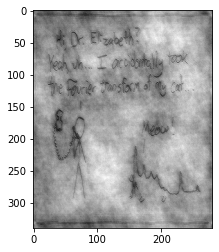

In [16]:
# To view the image whcih is combination of magnitude of image1 and phase of image2.

imgCombined11 = original1.real
plt.imshow(imgCombined11, cmap='gray')

new_image = Image.fromarray(imgCombined11)
new_image.show()
# cv2.imwrite('combination12.png', imgCombined11)

In [17]:
# Combining magnitude of image2 and phase of image1.

combined2 = np.multiply(np.abs(finalF2), np.exp(1j*np.angle(finalF1)))

In [18]:
# Implementing Inverse 2D DFT using row-column decomposition

intermediate12 = np.empty((A,B),dtype='complex_')
for i in range (0,A):
    interows12 = combined2[i,:]
    intermediate12[i,:]=ifft(interows12)
    
original2 = np.empty((A,B),dtype='complex_')
for j in range (0,B):
    intercolmns12 = intermediate12[:,j]
    original2[:,j]=ifft(intercolmns12)
    
print(original2.shape)

(340, 280)


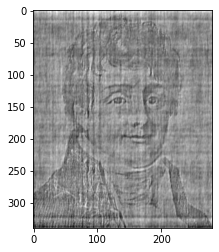

In [19]:
# To view the image whcih is combination of magnitude of image 2 and phase of image 1.

imgCombined22 = original2.real
plt.imshow(imgCombined22, cmap='gray')

new_image = Image.fromarray(imgCombined22)
new_image.show()
# cv2.imwrite('combination21.png', imgCombined22)